In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

model = AutoModelForTokenClassification.from_pretrained("noeminaepli/swiss_german_pos_model")
tokenizer = AutoTokenizer.from_pretrained("noeminaepli/swiss_german_pos_model")

pos_tagger = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

In [ ]:
test_phrase = "Mir gaht's guet hüt."

In [ ]:
pos_tagger(test_phrase)

In [ ]:
from germansentiment import SentimentModel
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

In [ ]:
model = SentimentModel()

In [ ]:
german_df = pd.read_csv("facebook_dataset/german.csv")

In [ ]:
texts = german_df.to_numpy()
results = []

In [ ]:
for group in chunker(texts, 100):
    print(group[0][1])

In [ ]:
german_df.head()

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
sentiments = pd.read_csv("../dataset/sentiment.csv")

In [3]:
# Melt the dataframe to make it easier to plot
melted = sentiments.drop(columns=['sentence_id']).melt(var_name='sentiment', value_name='count')

In [5]:
# sum by sentiment
melted = melted.groupby('sentiment').sum().reset_index()

In [6]:
melted

,sentiment,count
0,neg,505
1,neut,2413
2,pos,872
3,un,1315
4,unsure,467


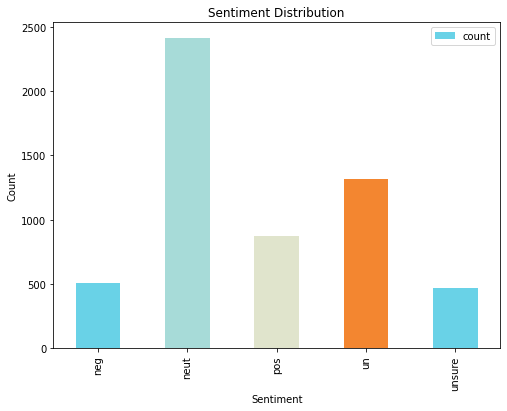

In [7]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
melted.plot(kind='bar', x='sentiment', y='count', ax=ax, color=['#69d2e7', '#a7dbd8', '#e0e4cc', '#f38630'])

# Set the plot title and axis labels
ax.set_title('Sentiment Distribution')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Remove the legend title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title=None)

# Show the plot
plt.show()